Whenever we generate a bootstrap sample, we randomly infer observation from the original 'n' set of observations which implies that each observation is equally likely to be selected.

The probability of selecting any particular observation which includes the jth observation is given by 1/n.

Thus the probability that first bootstrap observation is not the jth observation:-

           1 - 1/n

Each bootstrap observation is drawn independently which means that the probability of selecting jth observation remains the same for each and every draw.

Thus the probability is:-
            
            1 - 1/n

Probability that the jth draw is not selected for a single draw is given by:-

            1 - 1/n

The bootstrap sample contains 'n' observations. Thus, the probability that the jth observation is not selected in any of the 'n' draws is given by:-
   
            (1 - 1/n)^n

Here, we have to find the probability that the jth observation is in the bootstrap sample when n = 5.

So, the probability that the jth observation is not in the bootstrap is:-

          (1 - 1/5)^5 = (4/5)^5 = 0.3277

Thus, the probability that the jth observation is in the bootstrap is:-

          1 - 0.3277 = 0.6723


Probability that the jth observation is not in the bootstrap sample when n = 100:-

          (1 - 1/100)^100 = 0.3660

Thus, the probability that the jth observation is in bootstrap sample is:-

          1 - 0.3660 = 0.6340

The probability that the jth observation is not in the bootstrap sample when n = 10,000 is:-

         (1 - 1/10,000)^10,000 = 0.3679

Thus, the probability that the jth observation is in the bootstrap sample is:-

         1 - 0.3679= 0.6321

As 'n' approaches infinity, we can find the limit of (1 - 1/n)^n as n --> ∞:-

         lim(1 - 1/n)^n = 1/e = 0.3679  
         n->∞

Thus, the probability that the jth observation is not in bootstrap sample approaches 0.3679.

Now, the probability that the jth observation is in the bootstrap sample as n approaches infinity is:-

        1 - 1/e = 1 - 0.3679 = 0.6321

In [ ]:
import pandas as pd

# Load the uploaded CSV file
file_path = "/content/Carseats.csv"
carseats_data = pd.read_csv(file_path)

# Display the first few rows of the data
carseats_data.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (70% training, 30% test)
train_data, test_data = train_test_split(carseats_data, test_size=0.3, random_state=42)

# Check the sizes of the training and test sets
train_size = train_data.shape[0]
test_size = test_data.shape[0]

train_size, test_size


(280, 120)

There are 280 observations in the Training set and 120 observations in the Test set.

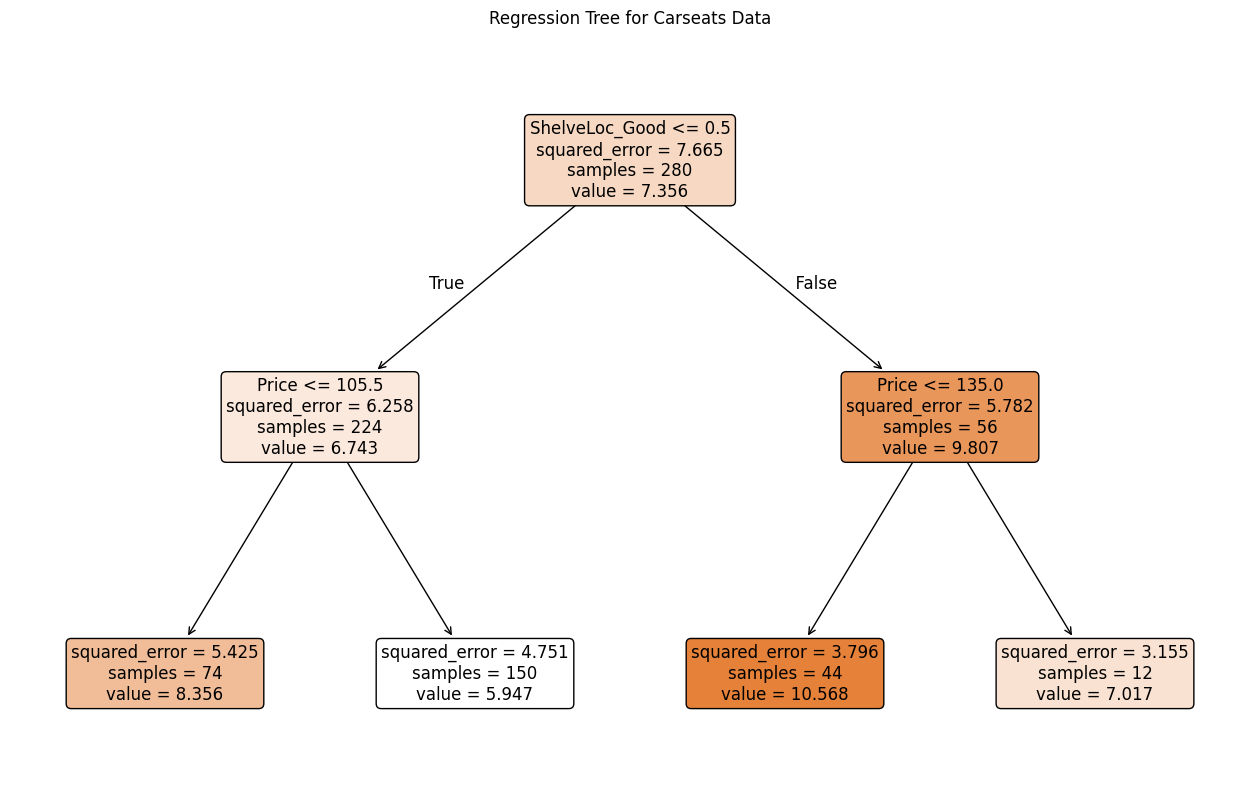

4.994984860115325

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Separate features and target variable
X_train = train_data.drop("Sales", axis=1)
y_train = train_data["Sales"]
X_test = test_data.drop("Sales", axis=1)
y_test = test_data["Sales"]

# Encode categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Fit a regression tree to the training set
reg_tree = DecisionTreeRegressor(max_depth=2, random_state=42)
reg_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_test = reg_tree.predict(X_test)

# Calculate test MSE
test_mse = mean_squared_error(y_test, y_pred_test)

# Plot the regression tree
plt.figure(figsize=(16, 10))
plot_tree(reg_tree, feature_names=X_train.columns, filled=True, rounded=True, fontsize=12)
plt.title("Regression Tree for Carseats Data")
plt.show()

test_mse

The tree was built with a maximum depth of 2 because we had to analyze only the top two levels of the tree.

The 'Mean Squared Error' (MSE) is 4.994984

In [ ]:
from sklearn.ensemble import BaggingRegressor

# Fit a Bagging Regressor to the training set
bagging_regressor = BaggingRegressor(n_estimators=100, random_state=42)
bagging_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_bagging = bagging_regressor.predict(X_test)

# Calculate test MSE for the bagging model
test_mse_bagging = mean_squared_error(y_test, y_pred_bagging)

test_mse_bagging

2.5352533115833333

Since, the feature importance analysis is not possible for bagging in scikit-learn, so we pay attention on the model's metrics:-



*   Bagging Model's Test MSE = 2.53525
*   Regression Tree's Test MSE = 4.994984

Lower MSE of the bagging model indicates a better fit as compared to the regression tree.



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Fit a Random Forest Regressor to the training set
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test)

# Calculate test MSE for the Random Forest model
test_mse_rf = mean_squared_error(y_test, y_pred_rf)

# Get feature importance
feature_importance_rf = pd.Series(random_forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

test_mse_rf, feature_importance_rf

(2.545121346416666,
 Price               0.314770
 ShelveLoc_Good      0.194939
 Age                 0.127246
 CompPrice           0.105046
 Advertising         0.072813
 Income              0.052941
 ShelveLoc_Medium    0.049092
 Population          0.039510
 Education           0.028722
 Urban_Yes           0.008460
 US_Yes              0.006462
 dtype: float64)

Test MSE for Random Forest Model = 2.54512

Features:-

  Price = 31.47%

  ShelveLoc_Good = 19.49%

  Age = 12.72%

  CompPrice = 10.5%

  Advertising = 7.28%


Effect of m:-

1.) Small 'm' = If 'm' is too small then it might lead to higher varinace

2.) Large 'm' = If 'm' is too large, the individual tress are more correlated, leading to less advantage from ansemble approach and increased risk.

3.) Optimal 'm' = An optimal 'm' is the square root of the number of total predictors. This provides a good balance, reducing correlation among trees.


In [ ]:
from xgboost import XGBRegressor

# Fit an XGBoost Regressor to the training set
xgboost_model = XGBRegressor(max_depth=3, n_estimators=1000, random_state=42)
xgboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgboost_model.predict(X_test)

# Calculate test MSE for the XGBoost model
test_mse_xgb = mean_squared_error(y_test, y_pred_xgb)

test_mse_xgb


2.253718690373354

Test MSE for the XGBoost Model with 1000 estimators = 2.25371

This MSE is lower than both the Bagging and Random Forest models which indicates that XGBoost proves to be better model for predictive performance for this dataset.